# Oscilador Harmônico

* PET-Física UFRN
* Amannda Laura 
* 14/06/2024

Diversos sistemas físicos vibratórios e oscilatórios, essencialmente qualquer poço de potencial, podem ser aproximados por um oscilador harmônico simples; desde sistemas mais simples como o movimento de um pêndulo, até sistemas mais complexos como o movimento de átomos em uma molécula e vibrações em estruturas cristalinas. Dessa forma, o oscilador harmônico faz-se um dos modelos fundamentais da física tendo uma grande aplicabilidade em diversas áreas das engenharias e física, além de servir como ponto de partida para grande parte da teoria quântica de campos, por seu Hamiltoniano ser basicamente a soma dos quadrados de duas variavéis canonicamente conjugadas[1,2,4].

 O objetivo desse Notebook será introduzir e solucionar o Oscilador Harmônico Quântico simples, em uma dimensão, usando o método de Runge-Kutta da 4ª ordem, em que plotares a solução para alguns estados excitados com fim de analisar o comportamento da função de onda; também trataremos da normalização da função e do limite clássico quando temos um $n$ grande. 

 Este Notebook possui 4 seções:

 1. Introdução
 2. Solução númerica 
 3. Discussão dos resultados
 4. Conclusão

## Importando bibliotecas

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Introdução

 Podemos considerar uma partícula restrita ao movimento apenas em uma dimensão, e supomos que exista uma posição de equilíbrio estável na origem, ao deslocarmos essa partícula uma força, chamada de "força restauradora", contrária ao movimento tende a restaurar a partícula para sua posição inicial. Essa força é uma função que pode ser mais complexa envolvendo alguma derivada temporal de mais alta ordem da coordenada de posição, mas para essa introdução iremos considerar o caso em que essa força $F$ é uma função apenas do deslocamento, de forma $F = F(x)$. Supomos que a função $F(x)$ possui derivadas contínuas de todas as ordens de modo que a função possa ser expandida em uma série de Taylor:

$$
F(x) = F_0 + x \Big(\frac{dF}{dx}\Big)_0 + \frac{1}{2!} x^2 \Big(\frac{d^2F}{dx^2}\Big)_0 + ...
$$

Em que $F_0$ é o valor de $F(x)$ na origem e $(d^nF/dx^n)_0$ é o valor da n-ésima derivada na origem. $F_0$ deve ser nulo pois a origem foi definida acima como o ponto de equilíbrio, por tanto, se $F_0$ for diferente de zero a partícula estaria se afastando do ponto de equilíbrio e não retornaria. Para deslocamentos suficientemente pequenos podemos desprezar todos os termos envolvendo potências mais altas de $x$ e, então, ao definirmos $k \equiv - (dF/dx)_0$ aproximamos a relação para uma força de restauração linear

$$
F(x) = -kx
$$

Também conhecida como **Lei de Hooke**, que pode ser aplicada (apenas como uma aproximação) a sistemas que envolvem deformações elásticas, enquanto os limites elásticos não são excedidos e os deslocamentos são pequenos, pois a força de restauração não é tão simples quanto a tratada pela Lei de Hooke.

### Oscilador Harmônico Clássico 1D

Podemos iniciar determinando a equação de movimento do oscilador harmônico simples em uma dimensão, obtida a partir da Lei de Hooke ao igualarmos a força da equação newtoniana $F = m a $, temos [1,3]:

$$
F = -kx = m \ddot{x}
$$

$$
  m\ddot{x} + kx = 0
$$

Definindo a frequência angular como $\omega \equiv \sqrt{k/m}$, temos que uma das soluções para essa equação diferencial é:

$$
x(t) = Asin(\omega_0 t - \phi)
$$
em que $A$ é a posição extrema da partícula $\phi$ uma fase da oscilação. A energia cinética $T$ desse oscilador será:
$$
 T= \frac{1}{2}m \dot{x}^2 = \frac{P^2}{2m}
$$
de forma que $p = m \frac{dx}{dt}$ é o momento linear da partícula. Agora, para determinamos a energia total do oscilador falta determinar a energia potencial do sistema. Sabendo que a energia potencial está diretamente relacionada á força atuante nele por
$$
F = - \frac{dV}{dx} \Longrightarrow V(x) = V_0 + \frac{kx^2}{2},
$$

considerando que o potencial mínimo da partícula é zero, podemos simplicar a equação acima resultando em

$$
V(x) = \frac{kx^2}{2}.
$$
Podemos plotar o potencial pela posição, para compararmos mais a frente, e para isso iniciamos definindo as condições iniciais, as funções de $x$ e do potencial. Posteriormente é feito o plot.

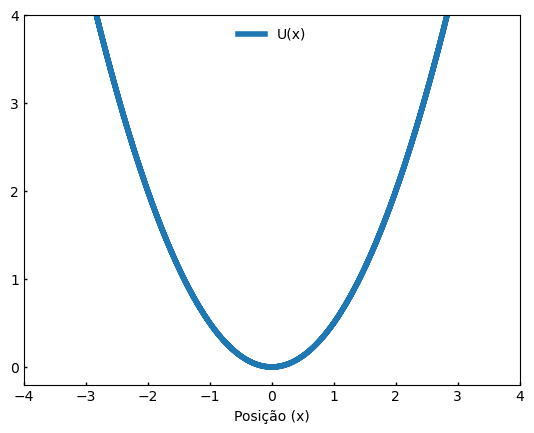

In [11]:

omega = 1
k = 1

# Condições iniciais
x0 = -5.0 
v0 = 0.0 

# Tempo
t = np.linspace(0, 10, 1000)  

x = x0 * np.cos(omega * t) + (v0 / omega) * np.sin(omega * t)

pot_classic = 0.5 * k * x**2

plt.plot(x, pot_classic, label='U(x)',  linewidth = 4)
plt.xlabel('Posição (x)')
plt.yticks([0, 1, 2, 3, 4])
plt.ylim(-0.2, 4)
plt.xlim(-4,4)
plt.legend(frameon=False, loc = 'upper center')
plt.tick_params(axis='y', which='both', top = True, right = False, direction = 'in', length=2, width=1)
plt.tick_params(axis='x', which='both', top = False, right = False, direction = 'in', length=2, width=1)
plt.show()

então, concluimos que a energia total desse sistema é

$$
E = T + U = \frac{P^2}{2m}+ \frac{1}{2}k\omega x^2
$$

a partir desse resultado temos que a energia total é independente do tempo, ou seja, a energia é conservada.

### Oscilador Harmônico Quântico 1D

Para o Oscilador Harmônico Quântico iremos utilizar a princípio a 1ª quantização. Iniciamos então quantizando as energias cinética e potencial do oscilador clássico, uma vez que agora tratamos de uma partícula cujo vetor de estado $\ket{\psi}$ obedece à equação de Schrödinger [2]

$$
i\hbar \frac{d}{dt}\ket{\psi} = H\ket{\psi}
$$

e para isso, iremos considerar $x \rightarrow \hat{x}$ e $p \rightarrow \hat{p}$, em que $\hat{x}$ é o operador posição e $\hat{p}$ é o operador momento linear e $\hat{p}_x = i\hbar d/dx$, ambos no espaço da posição. Para obtermos $(\hat{p_x})^2$ devemos aplicar o operador a si mesmo de maneira que 
$$(\hat{p_x})^2 = \hat{p_x}\hat{p_x} = -\hbar \frac{d^2}{dx^2}
$$ 
assim temos que o operador hamiltoniano do problema será

$$
\hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + \frac{1}{2}m\omega^2\hat{x}^2,
$$

além disso, podemos substituir esse operador na equação de Schrödinger independente do tempo,
$$
\hat{H}\psi = E\psi
$$

sabendo que $\bra{x}\ket{\psi} = \psi(x)$, e que $\hat{x}$ e hermitiano. Podemos atuar $\bra{x}\hat{x} = \bra{x}x$, de tal forma que $\bra{x}\hat{x}\ket{\psi} = x\psi(x)$. E, finalmente encontramos:

$$
-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2} + \frac{1}{2}m\omega^2x^2\psi = E \psi
$$
que é o problema que será desenvolvido a seguir.


## Solução numérica

A equação acima é uma EDO de segunda ordem, e para resolve-la numericamente podemos rescreve-la como abaixo para visualizar melhor
$$
\bigg[\frac{\hbar^2}{2m}\frac{d^2}{dx^2} - \frac{1}{2}m\omega^2x^2 + E\bigg] \psi(x) = 0 
$$
dividindo por $2m/\hbar^2$ 
$$
\bigg[\frac{d^2}{dx^2} - \frac{2m}{\hbar^2}\bigg(\frac{1}{2}m\omega^2x^2 - E\bigg)\bigg] \psi(x) = 0 
$$
agora, iremos reescrever a EDO como duas EDOs de primeira ordem 

$$
\frac{d\psi(x)}{dx} = y(x)
$$
e
$$
\frac{dy(x)}{dx} = \bigg[ \frac{2m}{\hbar^2}\bigg(E - \frac{1}{2}m\omega^2x^2\bigg)\bigg] \psi(x)
$$

em que $y(x)$ descreve a derivada de $\psi(x)$. Feito isso, podemos aplicar o método de Runge-Kutta de 4ª ordem, por ter um erro associado menor do que outros métodos [5].

Definimos nossa função e as constantes

In [12]:
def f(x, psi, y):
   
    h_bar = 1  
    m = 1   
    w = 1      
    y_der = (2*m/h_bar**2) * (0.5*w*x**2 - E) * psi
    
    return y_der

Agora vamos definir  método de Runge-Kutta de 4ª ordem

In [13]:
def RK4(f, x0, u0, u_prime0, h, N):
    
    
    x_values = [x0]          # armazenar os valores de x
    psi_values = [u0]          # armazenar os valores de psi
    
    for _ in range(N):
        x = x_values[-1]     
        u = psi_values[-1]     
        u_prime = u_prime0  
        
        # Metodo de Runge-Kutta de quarta ordem
        k1 = h * u_prime
        l1 = h * f(x, u, u_prime0)
        k2 = h * (u_prime + 0.5 * l1)
        l2 = h * f(x + 0.5 * h, u + 0.5 * k1, u_prime0 + 0.5 * l1)
        k3 = h * (u_prime + 0.5 * l2)
        l3 = h * f(x + 0.5 * h, u + 0.5 * k2, u_prime0 + 0.5 * l2)
        k4 = h * (u_prime + l3)
        l4 = h * f(x + h, u + k3, u_prime0 + l3)
        
        u_next = u + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)  
        u_prime_next = u_prime + (1/6) * (l1 + 2 * l2 + 2 * l3 + l4)  #
        
        x_values.append(x + h)    
        psi_values.append(u_next)  
        u_prime0 = u_prime_next  
    
    return x_values, psi_values

Definindo os parametros iniciais para $x$, $\psi(x)$ e para a derivada de $\psi(x)$

In [14]:
x0 = -5         
y0 = 0          
y_prime0 = 1   
h = 0.01        # tamanho do passo
N = 1000        # numero de passos


Também precisaremos definir a energia do nosso sistema, e para isso iremos primeiramente introduzir alguns operadores da 2ª quantização, para então definir e encontrar os autovalores dessa energia [2,4]. Note que iremos usar a 2ª quantização apenas com fim didático.

#### Operador Criação e Aniquilação

$$
\hat{a}^\dagger = \sqrt{\frac{m\omega}{2\hbar}}\left(\hat{x} - \frac{i\hat{p}}{m\omega}\right)
$$

$$
\hat{a} = \sqrt{\frac{m\omega}{2\hbar}}\left(\hat{x} + \frac{i\hat{p}}{m\omega}\right)
$$

Com os autovalores associados:

$$
\hat{a}^\dagger \ket{\varphi_n} =\sqrt{n+1}\ket{\varphi_{n+1}} 
$$

e

$$
\hat{a}\ket{\varphi_n} =\sqrt{n}\ket{\varphi_{n-1}}
$$

Como esses dois operadores não são hermitianos, também vamos definir o operador Número que é hermitiano e dado por:

$$
\hat{N} = \hat{a}^\dagger\hat{a},
$$

expandindo a expressão que define o operador número de forma direta, temos:

$$
\hat{a}^\dagger\hat{a} = \sqrt{\frac{m\omega}{2\hbar}}\left(\hat{x} - \frac{i\hat{p}}{m\omega}\right) \sqrt{\frac{m\omega}{2\hbar}}\left(\hat{x} + \frac{i\hat{p}}{m\omega}\right)
$$

$$
\hat{a}^\dagger\hat{a} = \left(\frac{m\omega}{2\hbar}\right)\left(\hat{x}^2 + \frac{\hat{p}^2}{m^2\omega^2}\right) + \left(\frac{i}{2\hbar}\right)[\hat{x},\hat{p}]
$$


Usando as seguintes relações podemos reescrever a equação acima

$$
\frac{\hat{H}}{\hbar\omega} = \left(\frac{m\omega}{2\hbar}\right)\left(\hat{x}^2 + \frac{\hat{p}^2}{m^2\omega^2}\right)
$$

e

$$
[\hat{x},\hat{p}] = i\hbar
$$

Dessa forma concluimos que 
$$
\hat{a}^\dagger\hat{a} = \frac{\hat{H}}{\hbar\omega} - \frac{1}{2}
$$

Sendo $\hat{a}^\dagger\hat{a}$ = $\hat{N}$, temos então

$$
\hat{H} = \hbar\omega\bigg(\hat{N}+\frac{1}{2}\bigg).
$$




#### Encontrando os autovalores da Energia

 Inicialmente iremos diagonalizar o hamiltoniano $\hat{H}$ e o operador número $\hat{N}$ ao mesmo tempo, pois $\hat{H}$ e $N$ comutam [2]. Podemos então definir um autovetor de energia de $\hat{N}$ pelo seu autovalor $n$ e aplicar o hamiltoniano ao estado $\ket{n}$ :

$$
\hat{N}\ket{n}=n\ket{n}
$$

$$
\hat{H}\ket{n} = \hbar\omega\bigg(n+\frac{1}{2}\bigg)\ket{n},
$$

então os autovalores serão de energia serão dados por:

$$
E_n=\bigg(n+\frac{1}{2}\bigg)\hbar\omega.
$$

Podemos demonstrar ainda que o autovalor $n$ deve ser um valor inteiro e positivo. Utilizando relações de comutação necessárias, podemos chegar  aos autovalores dos operadores  $\hat{a}$ e $\hat{a}^\dagger$, que serão necessários para discussão do motivo de $n$ respeitar estas restrições.

$$
[\hat{N},\hat{a}] = [\hat{a}^\dagger\hat{a},\hat{a}] = \hat{a}^\dagger[\hat{a},\hat{a}] + [\hat{a}^\dagger,\hat{a}]\hat{a}
$$
Sabendo que, $[\hat{a},\hat{a}] = 0$ e que $[\hat{a},\hat{a}^\dagger] = 1$, estes resultados podem ser obtidos de forma direta ao utilizar a forma dos operadores $\hat{a}$ e $\hat{a}^\dagger$ em termos dos operadores posição e momento, obtemos enfim:
$$\begin{equation}
[\hat{N},\hat{a}] = -\hat{a} 
\end{equation}
$$

Com um desenvolvimento análogo, obtem-se:
$$\begin{equation}
[\hat{N}, \hat{a}^\dagger] = \hat{a}^\dagger
\end{equation}
$$
Atuando o comutado $[\hat{N},\hat{a}]$ no autovetor de estado $\ket{n}$, obtemos a seguinte relação:

$$
[\hat{N},\hat{a}]\ket{n} = (\hat{N}\hat{a}- \hat{a}\hat{N})\ket{n}
$$

$$
 \hat{N}\hat{a}\ket{n} = ([\hat{N},\hat{a}] + \hat{a}\hat{N})\ket{n}
$$

utilizando a relação $(1)$, temos:

$$
\hat{N}\hat{a}\ket{n} = (-\hat{a} + \hat{a}\hat{N})\ket{n} = \hat{a}(\hat{N}-1)\ket{n} = (n-1)\hat{a}\ket{n}
$$

Com a atuação do comutador $[\hat{N},\hat{a}^\dagger]$, e uma manipulação análoga, obtem-se:

$$
\hat{N}\hat{a}^\dagger = (n+1)\hat{a}^\dagger\ket{n}
$$

Estas relações nos indicam que tanto $\hat{a}$ quanto $\hat{a}^\dagger$ também são autovetores de $\hat{N}$ com autovalores aumentados ou diminuídos por 1. Estas relações nos leva a entender o motivo destes operadores serem conhecidos como operadores de aniquilação e criação, respectivamente. Uma vez atuado o operador de aniquilação, o autovalor correspondente equivale a destruição de um quantum de energia $\hbar\omega$ e, de forma análoga, para o de criação, em que há o aumento de um quantum de energia.

Isso implica que $a\ket{n}$ e $\ket{n-1}$ são o mesmo, a menos por uma constante multiplicativa, por tanto, podemos escrever

$$
a\ket{n} = c \ket{n-1}
$$
em que $c$ é uma contante, convencionando que seja real e positiva. Observamos então que 

$$
\bra{n}a^{\dagger}a\ket{n} = |c|^2.
$$ 
Podemos calcular o lado esquerdo, pelas definições acima 
$$
\bra{n}\hat{N}\ket{n} = |c|^2 \longrightarrow n = |c|^2
$$

Dessa forma

$$
a \ket{n}=\sqrt{n}\ket{n-1}
$$
e
$$
a^{\dagger} \ket{n}=\sqrt{n+1}\ket{n+1}.
$$

 Ao aplicar varias vezes o operador aniquilação obtemos autovetores de operadores númericos com valores de $n$ cada vez menores até o fim da série, mas esse "fim" apenas existirá caso comecemos com um $n$ de valor númerico real e positivo. Caso fosse iniciado com um $n$ não inteiro a sequência não terminaria, e isso nos levaria a autovetores com valores negativos de $n$. Além da condição de positividade para a norma de $a\ket{n}$ temos que 
$$
n = \bra{n}N\ket{n} = (\bra{n}a^{\dagger}) \cdot (a\ket{n}) \geq 0
$$

Outra forma de pensar no problema para que $n$ sempre seja positivo, é devido ao autovalor de energia do hamiltoniano, uma vez que não faz sentido falar em energias negativas ($\hat{H}\ket{n} = \hbar\omega\bigg(n+\frac{1}{2}\bigg)\ket{n}$).

* Autovalor de E para $n=0$
$$
E_0=\bigg(0+\frac{1}{2}\bigg)\hbar\omega
$$
Como estamos usando unidades naturais 
$$
E_0 = 0.5
$$



#### Plotando o gráfico no estado fundamental 

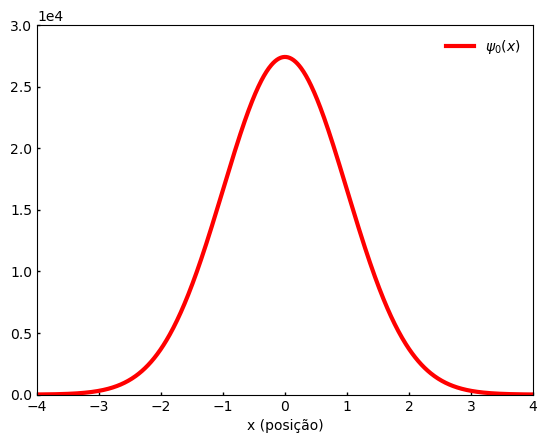

In [15]:
E = 0.5

# Chamando a função Runge-Kutta
x_values, psi_values = RK4(f, x0, y0, y_prime0, h, N)

plt.plot(x_values, psi_values, color='red', linewidth=3, label='$\psi_0(x)$')
plt.xlim(-4, 4)
plt.ylim(0, 30000)
plt.xlabel('x (posição)')
plt.legend(frameon=False, loc = 'upper right')
plt.tick_params(axis='y', which='both', top = True, right = False, direction = 'in', length=2, width=1)
plt.tick_params(axis='x', which='both', top = False, right = False, direction = 'in', length=2, width=1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#### Densidade de Probabilidade 

Sabemos que a energia $E$ pode assumir qualquer valor real, entretanto, a probabilidade de se encontrar a “partícula” em todo espaço (S) deve ser sempre finita e unitária, de modo que $S$ é definido como:

$$
S = \int_{-\infty}^{\infty} |\Psi(x)|^2 dx = 1
$$

Por tanto, para cada valor de $\psi(x)$ encontrado ao longo do espaço, iremos quadrar e armazenar para plotarmos a densidade de probabilidade.

(0.0, 800000000.0)

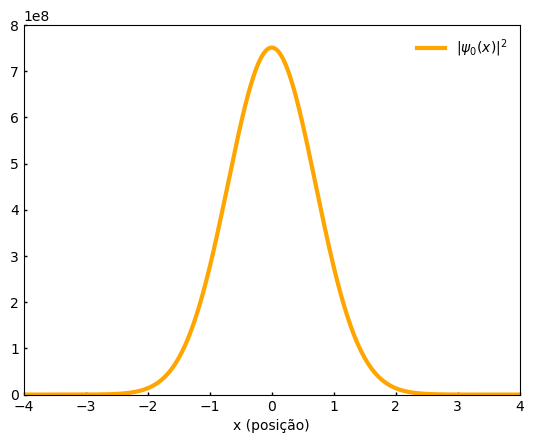

In [16]:

probability = np.abs(psi_values)**2

plt.plot(x_values, probability, 'orange', linewidth=3, label = '$|\psi_0(x)|^2$')
plt.legend()
plt.xlabel('x (posição)')
plt.legend(frameon=False, loc = 'upper right')
plt.tick_params(axis='y', which='both', top = True, right = False, direction = 'in', length=2, width=1)
plt.tick_params(axis='x', which='both', top = False, right = False, direction = 'in', length=2, width=1)
plt.xlim(-4, 4)
plt.ylim(0,800000000)

#### Normalização

Acima consideramos estados naturalmente ortonormais, porém, se assumirmos que os estados não são necessariamente ortonormais, devemos introduzir um termo de normalização (|A|^2) à expressão da densidade de probabilidade
$$
S = |A|^2 \int_{-\infty}^{\infty} |\Psi(x)|^2 dx = 1,
$$
isolando $|A|$
$$
|A| = \Bigg(\frac{1}{\int_{-\infty}^{\infty} |\Psi(x)|^2}\Bigg)^{\frac{1}{2}}.
$$
Agora iremos plotar $\psi(x)$ e $|\psi(x)|^2$ normalizados.

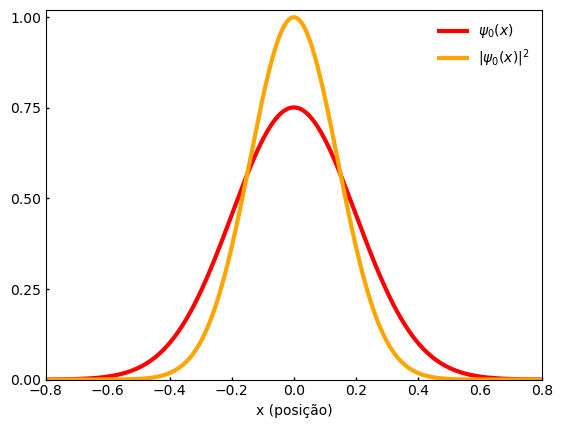

In [17]:
x_values = np.linspace(-1, 1, len(x_values))

normalization_factor = np.sqrt(np.sum(np.abs(psi_values)**2) * h)
psi_values_normalized = np.array(psi_values) / normalization_factor
probability_normalized = probability / np.max(probability)


plt.plot(x_values, psi_values_normalized, 'red', linewidth=3, label='$\psi_0(x)$')
plt.plot(x_values, probability_normalized, 'orange', linewidth=3, label='$|\psi_0(x)|^2$')
plt.legend(frameon=False, loc = 'upper right')
plt.tick_params(axis='y', which='both', top = True, right = False, direction = 'in', length=2, width=1)
plt.tick_params(axis='x', which='both', top = False, right = False, direction = 'in', length=2, width=1)
plt.xlim(-0.8,0.8)
plt.ylim(0, 1.02)
plt.yticks([0,0.25, 0.5,0.75, 1])
plt.xlabel('x (posição)')
plt.show()

## Discussão dos resultados

O gráfico acima é uma curva gaussiana centrada na origem, indicando que a partícula é mais provavelmente encontrada perto do ponto de equilíbrio, com a probabilidade diminuindo exponencialmente à medida que se move para longe do centro ($|x| \rightarrow \infty$). Além disso, a energia mínima no estado fundamental indica que a partícula nunca está completamente em repouso devido ao princípio da incerteza de Heisenberg. Também podemos perceber que a curva da probabilidade é mais "estreita", isso acontece pois a densidade de probabilidade sempre será positiva e real, diferente da função de onda. O estado fundamental se mostra o mais simples, com ausênsia de 'nós' e apenas um pico na densidade de porbabilidade; para estados excitados, a densidade de probabilidade mostra padrões ondulatórios com nós, refletindo a natureza quantizada dos níveis de energia, como poderemos ver abaixo.

#### Para diversos valores de $n$

Densidade de probabilidade para o primeiro e segundo estado excitado

Apenas iremos mudar a energia e em seguida é feito o plot.

Text(0.5, 1.0, 'n = 2')

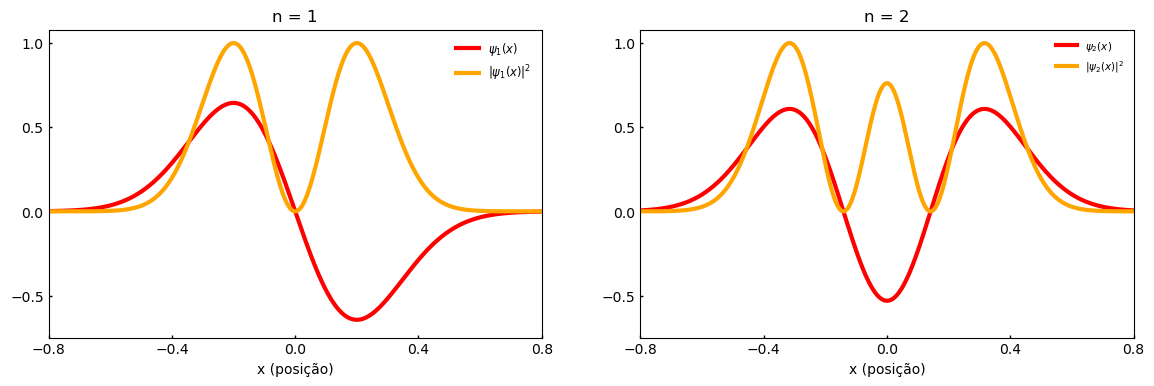

In [18]:
E = 1.5  # n =1
x_values, psi_values = RK4(f, x0, y0, y_prime0, h, N)
probability = np.abs(psi_values)**2
x_values = np.linspace(-1, 1, len(x_values))
normalization_factor = np.sqrt(np.sum(np.abs(psi_values)**2) * h)
psi_values_normalized = np.array(psi_values) / normalization_factor
probability_normalized = probability / np.max(probability)

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(x_values, psi_values_normalized, 'red', linewidth=3, label='$\psi_1(x)$')
plt.plot(x_values, probability_normalized, 'orange', linewidth=3, label='$|\psi_1(x)|^2$')
plt.tick_params(axis='y', which='both', top = True, right = False, direction = 'in', length=2, width=1)
plt.tick_params(axis='x', which='both', top = False, right = False, direction = 'in', length=2, width=1)
plt.legend(frameon=False, loc = 'upper right',fontsize='small')
plt.xticks([-0.8, -0.4, 0, 0.4, 0.8])
plt.yticks([-0.5,0, 0.5, 1])
plt.ylim(-0.75,1.08)
plt.xlim(-0.8,0.8)
plt.xlabel('x (posição)')
plt.title('n = 1')

E = 2.5  # n = 2
x_values, psi_values = RK4(f, x0, y0, y_prime0, h, N)
probability = np.abs(psi_values)**2
x_values = np.linspace(-1, 1, len(x_values))
normalization_factor = np.sqrt(np.sum(np.abs(psi_values)**2) * h)
psi_values_normalized = np.array(psi_values) / normalization_factor
probability_normalized = probability / np.max(probability)
plt.subplot(1, 2, 2)
plt.plot(x_values, psi_values_normalized, 'red', linewidth=3, label='$\psi_2(x)$')
plt.plot(x_values, probability_normalized, 'orange', linewidth=3, label='$|\psi_2(x)|^2$')
plt.xlim(-0.8,0.8)
plt.ylim(-0.75,1.08)
plt.xticks([-0.8, -0.4, 0, 0.4, 0.8])
plt.yticks([-0.5,0, 0.5, 1])
plt.legend(frameon=False, loc = 'upper right',fontsize= 7.5)
plt.tick_params(axis='y', which='both', top = True, right = False, direction = 'in', length=2, width=1)
plt.tick_params(axis='x', which='both', top = False, right = False, direction = 'in', length=2, width=1)
plt.xlabel('x (posição)')
plt.title('n = 2')

Ao plotar para os estados $n = 1 \text{ e } n = 2$ conseguimos visualizar claramente que a densidade de probabilidade sempre será positiva, independente do estado, e que tanto $\psi(x)$ quanto $|\psi(x)|^2$ são finitas em todo o domínio em que estão definidas, convergindo para zero quando $|x|$ tende ao infinito [5]. Além disso, é possível observar a questão da paridade da função[4,5], uma vez que $\psi(x)$ é uma função par quando $n$ for um número par, (podemos verificar facilmente pois a derivada de $\psi(0)$ é igual a zero), e será ímpar caso $n$ seja ímpar ($\psi(0) = 0$). Também vemos que a quantidade de nós e o valor de "$n$" são iguais, consequentemente, ao aumentar um, também aumentaremos o outro e isso pode ser interpretado como um aumento da complexibilidade da função de onda, mas também como a aplicação do operador $a^{\dagger}$ em que ele cria uma nova pertubação para o sistema. Dessa maneira, a densidades de probabilidade contém múltiplos picos, indicando regiões mais complexas de probabilidade de encontrar a partícula. Como o Oscilador Harmônico é um módelo que representa sistemas confinados por um poço de energia potêncial, podemos plotar a solução do OHQ confinado no potêncial e verificar o limite clássico.

* Limite Clássico

 Por fim, iremos verificar o limite clássico e para isso vamos utilizar o primeiro gráfico desse trabalho e plotaremos junto com a densidade de probabilidade do segundo estado excitado.

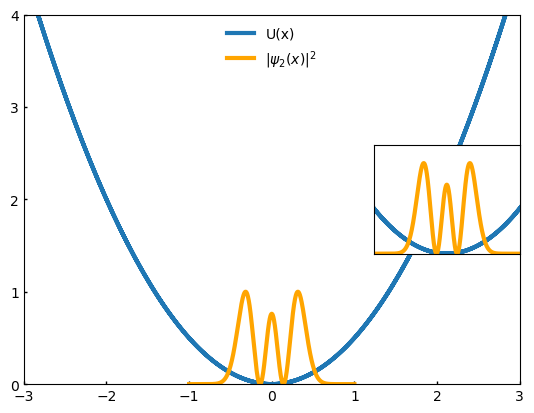

(-1.0, 1.0)

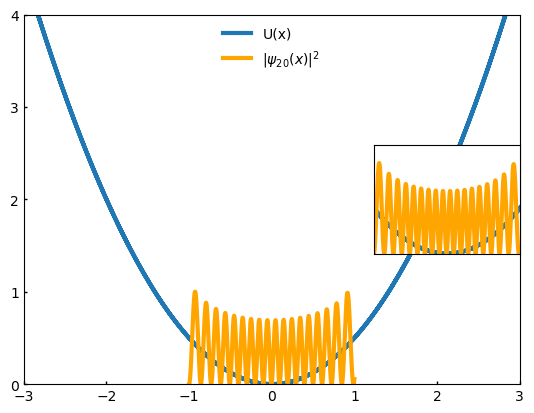

In [19]:

plt.plot(x, pot_classic,linewidth=3, label='U(x)')
plt.plot(x_values, probability_normalized, 'orange', linewidth=3, label='$|\psi_2(x)|^2$')
plt.tick_params(axis='y', which='both', top = True, right = False, direction = 'in', length=2, width=1)
plt.tick_params(axis='x', which='both', top = False, right = False, direction = 'in', length=2, width=1)
plt.ylim(0,4)
plt.xlim(-3,3)
plt.yticks([0,1,2,3,4,])
plt.legend(frameon=False, loc = 'upper center')
plt.subplot(3, 3, 6)
plt.plot(x, pot_classic, linewidth=3)
plt.plot(x_values, probability_normalized, 'orange', linewidth=3)
plt.yticks([])
plt.xticks([])
plt.ylim(0,1.2)
plt.xlim(-1,1)
plt.show()


E = 20.5  # n = 20
x_values, psi_values = RK4(f, x0, y0, y_prime0, h, N)
probability = np.abs(psi_values)**2
x_values = np.linspace(-1, 1, len(x_values))
normalization_factor = np.sqrt(np.sum(np.abs(psi_values)**2) * h)
psi_values_normalized = np.array(psi_values) / normalization_factor
probability_normalized = probability / np.max(probability)

plt.plot(x, pot_classic,linewidth=3, label='U(x)')
plt.plot(x_values, probability_normalized, 'orange', linewidth=3, label='$|\psi_{20}(x)|^2$')
plt.tick_params(axis='y', which='both', top = True, right = False, direction = 'in', length=2, width=1)
plt.tick_params(axis='x', which='both', top = False, right = False, direction = 'in', length=2, width=1)
plt.ylim(0,4)
plt.xlim(-3,3)
plt.yticks([0,1,2,3,4,])
plt.legend(frameon=False, loc = 'upper center')
plt.subplot(3, 3, 6)
plt.plot(x, pot_classic, linewidth=3)
plt.plot(x_values, probability_normalized, 'orange', linewidth=3)
plt.yticks([])
plt.xticks([])
plt.ylim(0,1.2)
plt.xlim(-1,1)

Podemos verificar o efeito de tunelamento na extremidade, e os limites clássicos de deslocamentos definidos pelo poço de energia potencial para uma dada energia total; vemos isso pois, mesmo que pequena ainda há uma probabilidade da partícula ser encontrada fora do poço. É interessante lembrar que a probabilidade de se encontrar a partícula no OH clássico está nas extremidades, diferentemente do OHQ [4]. Outro ponto interessante é que caso tenhamos um $n$ grande verificamos uma maior da probabilidade de se encontrar a partícula nas extremidades, assim como o oscilador clássico.

## Conclusão

Neste Notebook fizemos uma varredura geral sobre Osciladores em 1D partindo do clássico até nosso objetivo, o Quântico.......... sei não

## Referências


[1] Thorton, S. T.; Marion, J. B. Classical Dynamics. 5. ed. Belmont, CA: Brooks/Cole, 2003. 512 p. (ISBN: 0-534-40896-6). (p. 87-90).

[2] Sakurai, J. J.; Napolitano, J. Modern Quantum Mechanics. 2. ed. Boston: Addison-Wesley, 2011. 552 p. (ISBN: 978-0805382914). (p. 88-92).

[3] Griffiths, D. J. Quantum Mechanics. 2. ed. Upper Saddle River: Pearson Prentice Hall, 2005. (p. 31-33).

[4] Shankar, R. Principles of Quantum Mechanics. 2. ed. New York: Springer, 1994. p. 189-203.

[5] Abreu, L. López-Castillo, A. "Sintonização de estados quânticos: um estudo númerico do oscilador harmônico quântico". Quim. Nova, Vol. 35, No. 8, 1692-1695, 2012.

plotar densidade probabilidade x momento ------- diagrama de fase 